<a href="https://colab.research.google.com/github/DAVIDKSOUSA/DATA_SCIENCE/blob/master/compara%C3%A7%C3%A3o%20%C3%ADndice%20e%20acoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise Macro

In [1]:
#Bibliotecas 
# O Pyfolio está apresentado erro com a versão 1.0 do Pandas por isso acrescentei esse código para que o Google Colab use a versão anterior. Será necessário o restart da Runtime.
!pip install pandas==0.25.3

import pandas as pd
pd.__version__

'0.25.3'

In [2]:
!pip install pyfolio
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/pyfolio/pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


In [0]:
                        
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as wb

In [4]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


In [5]:
ativos = ["BOVA11.SA", "USDBRL=X"]
carteira = wb.get_data_yahoo(ativos, start = "2015-01-01" )["Adj Close"]
carteira = carteira.dropna()
carteira


[*********************100%***********************]  2 of 2 completed


,BOVA11.SA,USDBRL=X
Date,,
2015-01-02,47.259998,2.65320
2015-01-05,46.320000,2.69120
2015-01-06,46.580002,2.70310
2015-01-07,48.150002,2.69660
2015-01-08,48.509998,2.68080
...,...,...
2020-05-07,75.400002,5.71520
2020-05-08,77.430000,5.82872
2020-05-11,76.209999,5.47700


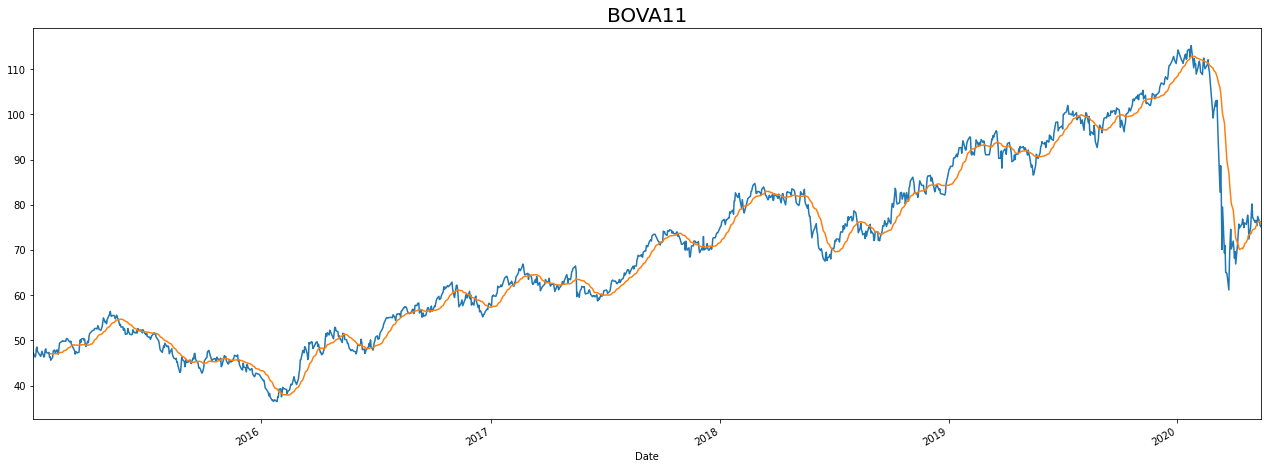

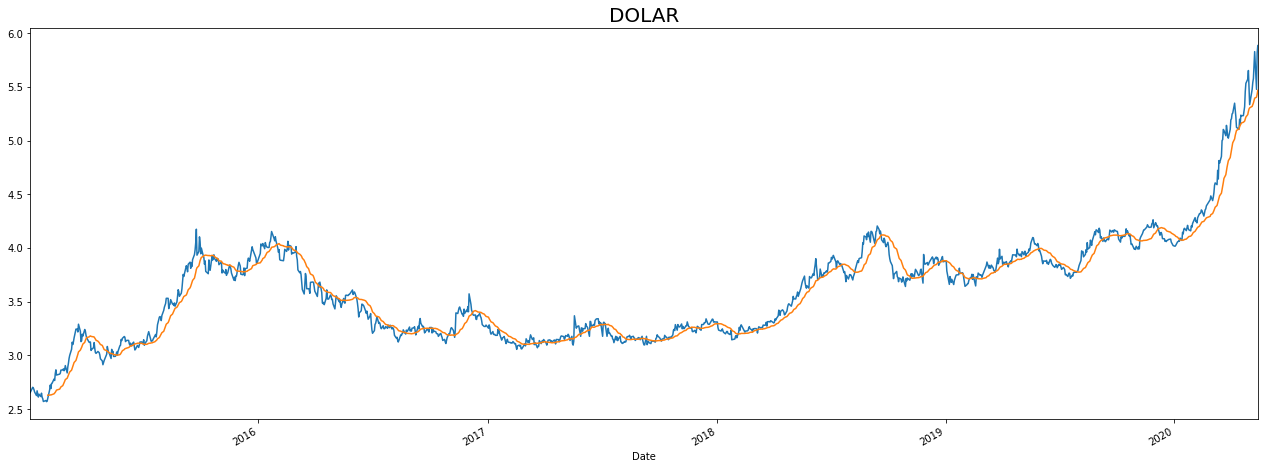

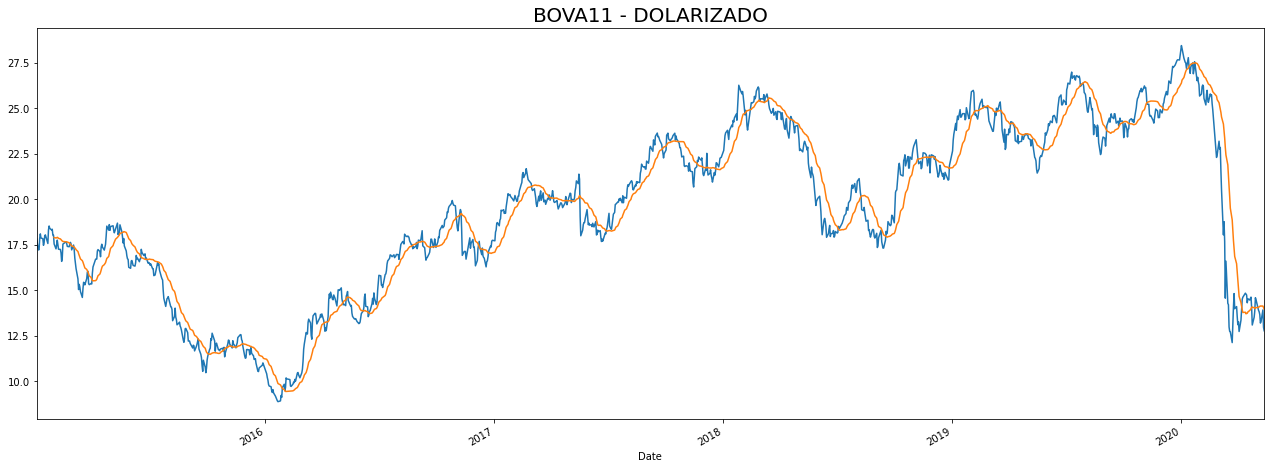

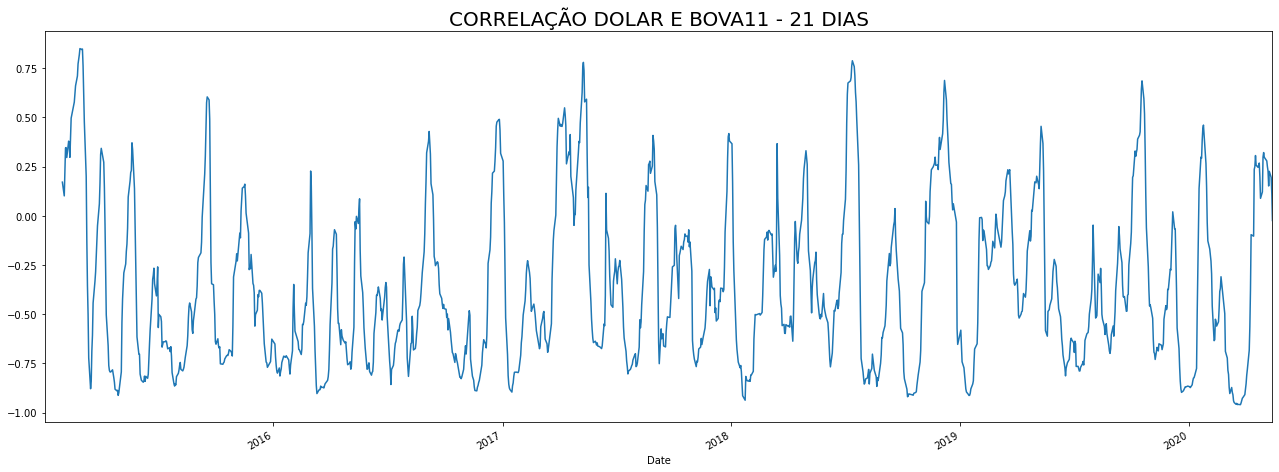

In [6]:
fig, ax1 = plt.subplots(figsize = (22,8))
fig, ax2 = plt.subplots(figsize = (22,8))
fig, ax3 = plt.subplots(figsize = (22,8))
fig, ax4 = plt.subplots(figsize = (22,8))

#BOVA11
bova11 = carteira["BOVA11.SA"]
bova_fatiado = bova11[(bova11.index.year <= 2020) & (bova11.index.year>=2015)]
bova_fatiado.plot(label="BOVA11", ax=ax1)
bova_fatiado.rolling(21).mean().plot(label ="MM21", ax=ax1)
ax1.set_title("BOVA11", fontsize= 20, loc= "center")
#plt.legend(shadow=True, fontsize= 20, loc= "upper left")

#DOLAR
dolar = carteira["USDBRL=X"]
dolar_fatiado = dolar[(dolar.index.year <= 2020) & (dolar.index.year>=2015)]
dolar_fatiado.plot(label= "DOLAR", ax=ax2)
dolar_fatiado.rolling(21).mean().plot(label ="MM21", ax=ax2)
ax2.set_title("DOLAR", fontsize= 20, loc= "center")
#plt.le(shadow=True, fontsize= 20, loc= "upper left")

#BAVA/DOLAR
bova11_dolarizado = carteira["BOVA11.SA"]/carteira["USDBRL=X"]
bova11_dolarizado_fatiado = bova11_dolarizado[(bova11_dolarizado.index.year <= 2020) & (dolar.index.year>=2015)]
bova11_dolarizado_fatiado.plot(label= "DOLAR", ax=ax3)
bova11_dolarizado_fatiado.rolling(21).mean().plot(label ="MM21", ax=ax3)
ax3.set_title("BOVA11 - DOLARIZADO", fontsize= 20, loc= "center")
#plt.legend(shadow=True, fontsize= 20, loc= "upper left")


carteira["USDBRL=X"].rolling(21).corr(carteira["BOVA11.SA"]).plot( ax = ax4)
ax4.set_title("CORRELAÇÃO DOLAR E BOVA11 - 21 DIAS", fontsize= 20, loc= "center" )

plt.show();


In [7]:
ticker_indice = ["JBSS3.SA", "BRFS3.SA", "BEEF3.SA", "MRFG3.SA"]
ativo = ["BRFS3.SA"]

indice = wb.get_data_yahoo(ticker_indice, period="5y")["Adj Close"]
ativo = wb.get_data_yahoo(ativo, period="5y")["Adj Close"]

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  1 of 1 completed


In [22]:
#considerar a possibilidade de montar ua media ponderada, pois os precos estao destorcidos devido a mudancas no mercado.
indice["Benchmark"] = indice.sum(axis = 1)/4
indice

,BEEF3.SA,BRFS3.SA,JBSS3.SA,MRFG3.SA,Benchmark
Date,,,,,
2015-05-13,8.568170,61.851490,15.363038,4.09,22.468174
2015-05-14,9.084556,62.604477,15.409311,4.09,22.802717
2015-05-15,9.180182,63.231979,15.196449,4.10,22.928083
2015-05-18,8.988929,63.000286,15.002098,4.04,22.754122
2015-05-19,9.706129,63.521595,15.603665,4.18,23.264383
...,...,...,...,...,...
2020-05-07,13.820000,18.410000,24.389999,13.62,17.576092
2020-05-08,13.800000,18.740000,23.450001,13.25,17.306034
2020-05-11,13.450000,20.850000,23.160000,13.75,17.811316


In [23]:
retorno_indice = indice.pct_change()
retorno_indice

,BEEF3.SA,BRFS3.SA,JBSS3.SA,MRFG3.SA,Benchmark
Date,,,,,
2015-05-13,NaN,NaN,NaN,NaN,NaN
2015-05-14,0.060268,0.012174,0.003012,0.000000,0.014890
2015-05-15,0.010526,0.010023,-0.013814,0.002445,0.005498
2015-05-18,-0.020833,-0.003664,-0.012789,-0.014634,-0.007587
2015-05-19,0.079787,0.008275,0.040099,0.034653,0.022425
...,...,...,...,...,...
2020-05-07,0.072981,0.005462,0.056759,0.073286,0.049667
2020-05-08,-0.001447,0.017925,-0.038540,-0.027166,-0.015365
2020-05-11,-0.025362,0.112593,-0.012367,0.037736,0.029197


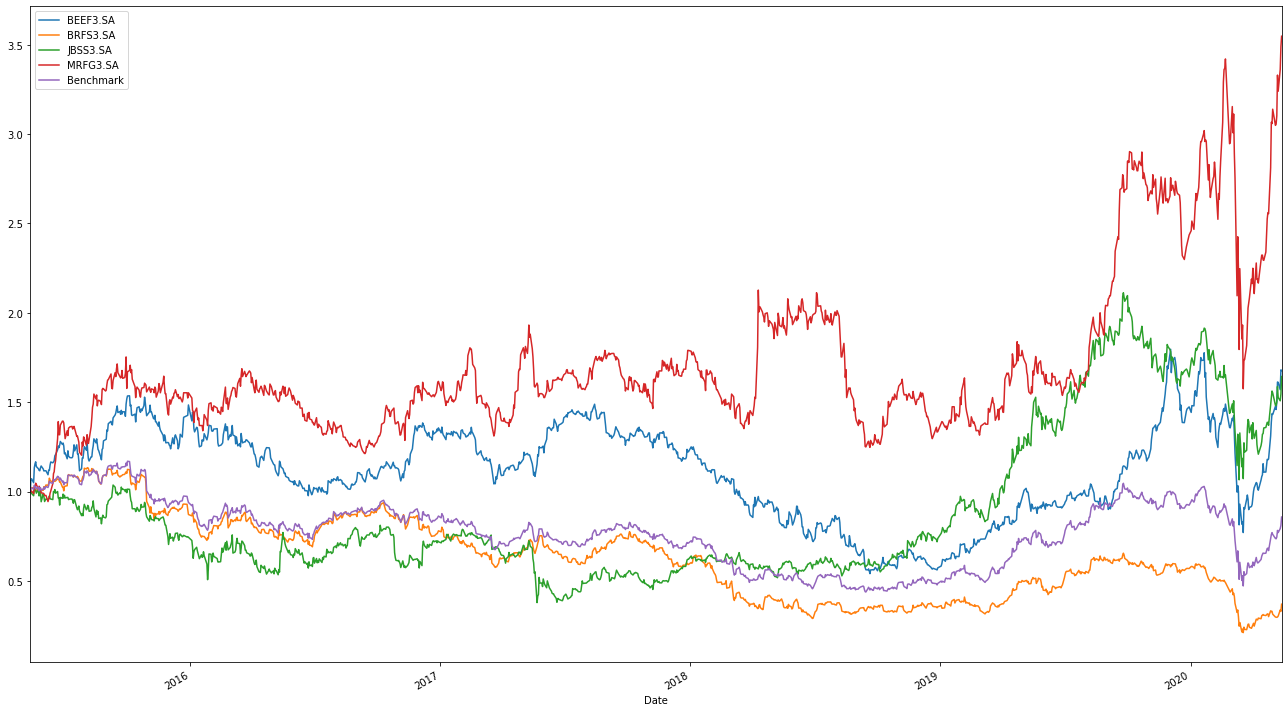

In [25]:
(indice/indice.iloc[0]).plot( kind = "line", figsize = (18,10))


plt.tight_layout();


In [11]:
retorno_indice_acumulado = (1+ retorno_indice).cumprod()
retorno_indice_acumulado.iloc[0] = 1
retorno_indice_acumulado

,BEEF3.SA,BRFS3.SA,JBSS3.SA,MRFG3.SA,Benchmark
Date,,,,,
2015-05-13,1.000000,1.000000,1.000000,1.000000,1.000000
2015-05-14,1.060268,1.012174,1.003012,1.000000,1.014639
2015-05-15,1.071429,1.022319,0.989157,1.002445,1.020428
2015-05-18,1.049107,1.018573,0.976506,0.987775,1.012892
2015-05-19,1.132812,1.027002,1.015663,1.022005,1.034924
...,...,...,...,...,...
2020-05-07,1.612947,0.297648,1.587577,3.330073,0.781550
2020-05-08,1.610612,0.302984,1.526391,3.239609,0.770423
2020-05-11,1.569763,0.337098,1.507514,3.361858,0.792343


In [12]:

retorno_indice_acumulado["saldo"] = carteira.sum(axis=1)/4


retorno_indice_acumulado["retorno"] = retorno_indice_acumulado["saldo"].pct_change()
retorno_indice_acumulado

,BEEF3.SA,BRFS3.SA,JBSS3.SA,MRFG3.SA,Benchmark,saldo,retorno
Date,,,,,,,
2015-05-13,1.000000,1.000000,1.000000,1.000000,1.000000,14.446875,NaN
2015-05-14,1.060268,1.012174,1.003012,1.000000,1.014639,14.526625,0.005520
2015-05-15,1.071429,1.022319,0.989157,1.002445,1.020428,14.644975,0.008147
2015-05-18,1.049107,1.018573,0.976506,0.987775,1.012892,14.370350,-0.018752
2015-05-19,1.132812,1.027002,1.015663,1.022005,1.034924,14.233950,-0.009492
...,...,...,...,...,...,...,...
2020-05-07,1.612947,0.297648,1.587577,3.330073,0.781550,20.278800,-0.008106
2020-05-08,1.610612,0.302984,1.526391,3.239609,0.770423,20.814680,0.026426
2020-05-11,1.569763,0.337098,1.507514,3.361858,0.792343,20.421750,-0.018878


Start date,2015-05-13
End date,2020-05-13
Total months,59
,Backtest
Annual return,-18.3%
Cumulative returns,-63.1%
Annual volatility,41.8%
Sharpe ratio,-0.27
Calmar ratio,-0.22
Stability,0.63
Max drawdown,-81.4%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,81.44,2015-08-05,2020-03-18,NaT,NaN
1,6.61,2015-06-10,2015-07-01,2015-07-07,20
2,3.39,2015-07-08,2015-07-27,2015-07-31,18
3,3.27,2015-05-19,2015-05-26,2015-06-02,11
4,0.91,2015-06-02,2015-06-03,2015-06-05,4


Stress Events,mean,min,max
Fall2015,-0.01%,-3.17%,2.20%
New Normal,-0.05%,-19.75%,15.86%


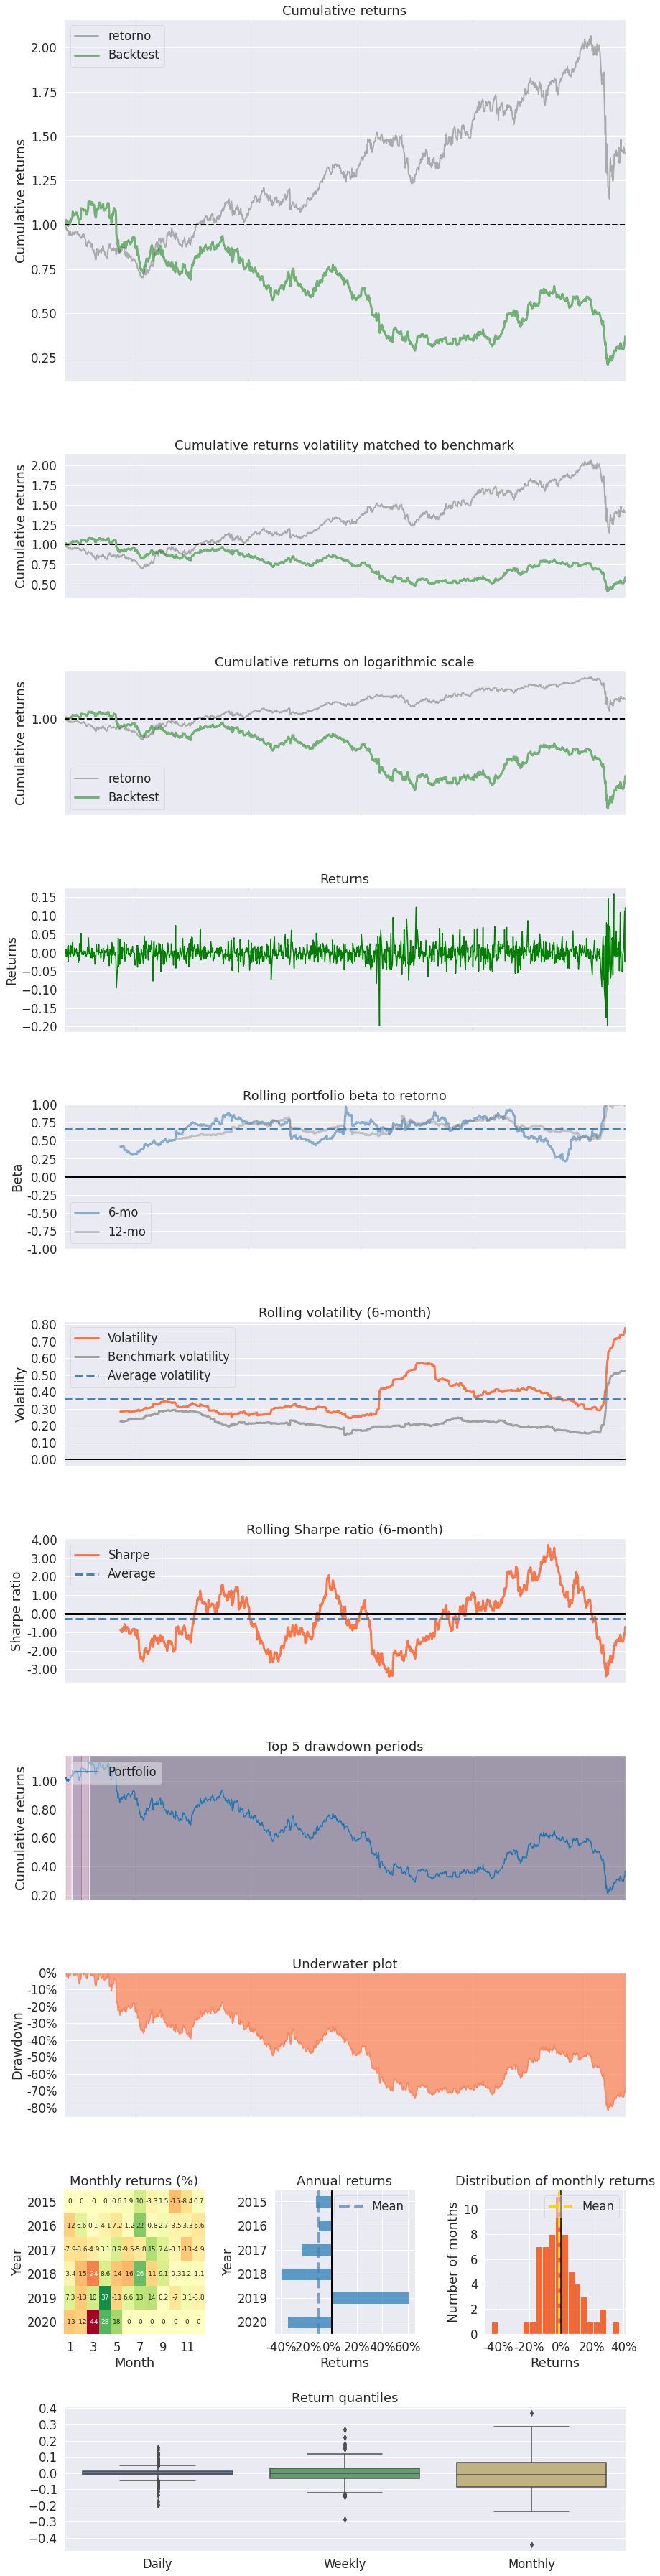

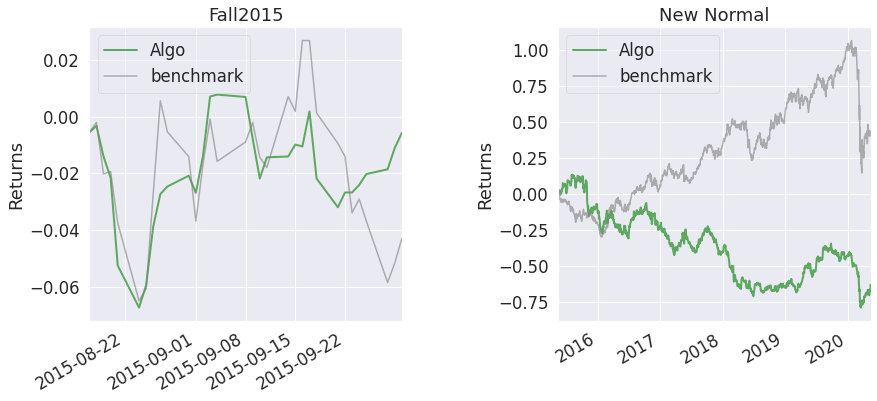

In [13]:
pf.create_full_tear_sheet(ativo.pct_change(), benchmark_rets= retorno_indice_acumulado["retorno"])